<a href="https://colab.research.google.com/github/morgwork/Distantly-Reading-IPCC-Reports/blob/main/IPCCM2_(4_16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This codebook cleans and analyzes the second IPCC Working Group III report published in 1995. Though it is titled "Working Group III:
Economic and Social Dimensions of Climate Change," I am including it in the corpus because it comes from the same working group. The full PDF is 438 pages, and a permanent link is available [here](https://https://archive.ipcc.ch/publications_and_data/publications_and_data_reports.shtml). I converted the PDF into a TXT file with ABBY Fine Reader 14.**

## Cleaning
In this section, I clean the files for analysis. 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
import string

all_punctuation = string.punctuation

print(f"All punctuation: {all_punctuation}")

All punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
# Remove stopwords function.

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

# Cleaning text function.
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()


In [6]:
with open("/content/IPCC2M.txt", "r", encoding='utf-8') as text:
    IPCCM2 = text.read()

In [7]:
MC1= IPCCM2.lower() # remove casing
MC2=MC1
print(MC2[:500])

﻿unep
contribution of working group iii
xj / wwtfi3r t/w /t< onomic and social
w<	x/vh a «	mwwb. -.k-zi
	a •	safe
	trt
climate change 1995
economic and social dimensions of climate change
	edited by
james p. bruce canadian climate program board	hoesung lee	erik e haites korea energy economics institute	margaree consultants inc.
contribution of working group iii to the second assessment report of the intergovernmental panel on climate change
published for the intergovernmental panel on climate ch


In [8]:
for p in all_punctuation:

  MC3=MC2.replace(p,'')

In [10]:
MC4=remove_Stopwords(MC3)

In [11]:
MC5=lemmatize_text(MC4)

In [12]:
MC6=clean_text(MC5)

## Analysis
In this section, I will analyze the cleaned files with some basic word counts to highlight significant terms. I will also create a few WordCloud visualizations for each report, one with all collocates true and two or three that remove disproportionately represented terms and bigrams.

In [13]:
IPCCM2words= MC6.split()
print('Number of words in IPCCM2:',len(IPCCM2words))

Number of words in IPCCM2: 220420


In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words("english")

word_tokens = nltk.word_tokenize(MC6)
MC7= [word for word in word_tokens if word not in stopword]

print(MC7)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['\ufeffunep', 'contribution', 'working', 'group', 'iii', 'xj', 'wwtfi3r', 'tw', 'onomic', 'social', 'w', 'xvh', '«', 'mwwb', 'kzi', '•', 'safe', 'trt', 'climate', 'change', '1995', 'economic', 'social', 'dimension', 'climate', 'change', 'edited', 'james', 'p', 'bruce', 'canadian', 'climate', 'program', 'board', 'hoesung', 'lee', 'erik', 'e', 'haites', 'korea', 'energy', 'economics', 'institute', 'margaree', 'consultant', 'inc', 'contribution', 'working', 'group', 'iii', 'second', 'assessment', 'report', 'intergovernmental', 'panel', 'climate', 'change', 'published', 'intergovernmental', 'panel', 'climate', 'change', 'w', 'cambridge', 'w', 'university', 'press', 'published', 'press', 'syndicate', 'university', 'ol', 'cambridge', 'pitt', 'building', 'trumpington', 'street', 'cambridge', 'cb2', '1rp', '40', 'west', '20th', 'street', 'new', 'york', 'ny', '10011', '4211', 

In [15]:
MC8= [word for word in MC7 if word.isalnum()] # need to join this
print(MC8)

['contribution', 'working', 'group', 'iii', 'xj', 'wwtfi3r', 'tw', 'onomic', 'social', 'w', 'xvh', 'mwwb', 'kzi', 'safe', 'trt', 'climate', 'change', '1995', 'economic', 'social', 'dimension', 'climate', 'change', 'edited', 'james', 'p', 'bruce', 'canadian', 'climate', 'program', 'board', 'hoesung', 'lee', 'erik', 'e', 'haites', 'korea', 'energy', 'economics', 'institute', 'margaree', 'consultant', 'inc', 'contribution', 'working', 'group', 'iii', 'second', 'assessment', 'report', 'intergovernmental', 'panel', 'climate', 'change', 'published', 'intergovernmental', 'panel', 'climate', 'change', 'w', 'cambridge', 'w', 'university', 'press', 'published', 'press', 'syndicate', 'university', 'ol', 'cambridge', 'pitt', 'building', 'trumpington', 'street', 'cambridge', 'cb2', '1rp', '40', 'west', '20th', 'street', 'new', 'york', 'ny', '10011', '4211', 'usa', '10', 'stamford', 'road', 'oakleigh', 'melbourne', '3166', 'australia', '0', 'ipc', 'c', '1996', 'iirst', 'published', '1996', 'printed'

In [16]:
from nltk import FreqDist
freq = FreqDist(MC8)
print(freq.most_common(100))

[('cost', 2488), ('change', 2460), ('climate', 2379), ('emission', 2283), ('country', 1717), ('energy', 1535), ('economic', 1255), ('policy', 1179), ('carbon', 1097), ('may', 995), ('model', 968), ('would', 910), ('study', 909), ('greenhouse', 888), ('tax', 878), ('global', 862), ('1993', 852), ('impact', 849), ('gas', 797), ('reduction', 769), ('level', 750), ('analysis', 749), ('rate', 746), ('international', 698), ('1994', 696), ('decision', 677), ('also', 644), ('social', 643), ('environmental', 625), ('effect', 625), ('1992', 624), ('option', 606), ('future', 584), ('benefit', 578), ('developing', 573), ('approach', 570), ('estimate', 563), ('us', 557), ('damage', 554), ('1', 552), ('technology', 549), ('development', 540), ('al', 540), ('assessment', 538), ('could', 534), ('value', 528), ('result', 525), ('one', 522), ('et', 507), ('issue', 502), ('system', 493), ('resource', 490), ('potential', 481), ('market', 474), ('time', 473), ('example', 473), ('co', 468), ('1991', 464), (

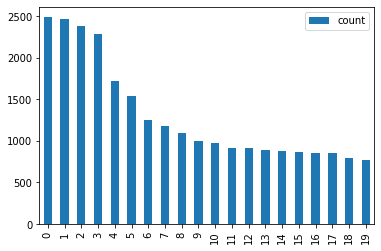

In [17]:
import pandas as pd

df = pd.DataFrame(list(freq.most_common(20)))
df.columns =['word', 'count']
df.plot(kind='bar');

In [18]:
print(df)

          word  count
0         cost   2488
1       change   2460
2      climate   2379
3     emission   2283
4      country   1717
5       energy   1535
6     economic   1255
7       policy   1179
8       carbon   1097
9          may    995
10       model    968
11       would    910
12       study    909
13  greenhouse    888
14         tax    878
15      global    862
16        1993    852
17      impact    849
18         gas    797
19   reduction    769


In [20]:
MC9=','.join(MC8)
print(MC9)

contribution,working,group,iii,xj,wwtfi3r,tw,onomic,social,w,xvh,mwwb,kzi,safe,trt,climate,change,1995,economic,social,dimension,climate,change,edited,james,p,bruce,canadian,climate,program,board,hoesung,lee,erik,e,haites,korea,energy,economics,institute,margaree,consultant,inc,contribution,working,group,iii,second,assessment,report,intergovernmental,panel,climate,change,published,intergovernmental,panel,climate,change,w,cambridge,w,university,press,published,press,syndicate,university,ol,cambridge,pitt,building,trumpington,street,cambridge,cb2,1rp,40,west,20th,street,new,york,ny,10011,4211,usa,10,stamford,road,oakleigh,melbourne,3166,australia,0,ipc,c,1996,iirst,published,1996,printed,united,state,america,library,congress,cataloginginpublication,data,available,catalog,record,book,available,british,library,isbn,0521,56051,9,hardback,isbn,052156s544,paperback,also,available,cambridge,university,press,climate,change,1995,science,climate,change,contribution,working,group,second,assessment

In [21]:
import pandas as pd
df=pd.DataFrame({'author': ['IPCC'], 'report': MC9}) 
df

author                                             report
0   IPCC  contribution,working,group,iii,xj,wwtfi3r,tw,o...

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud

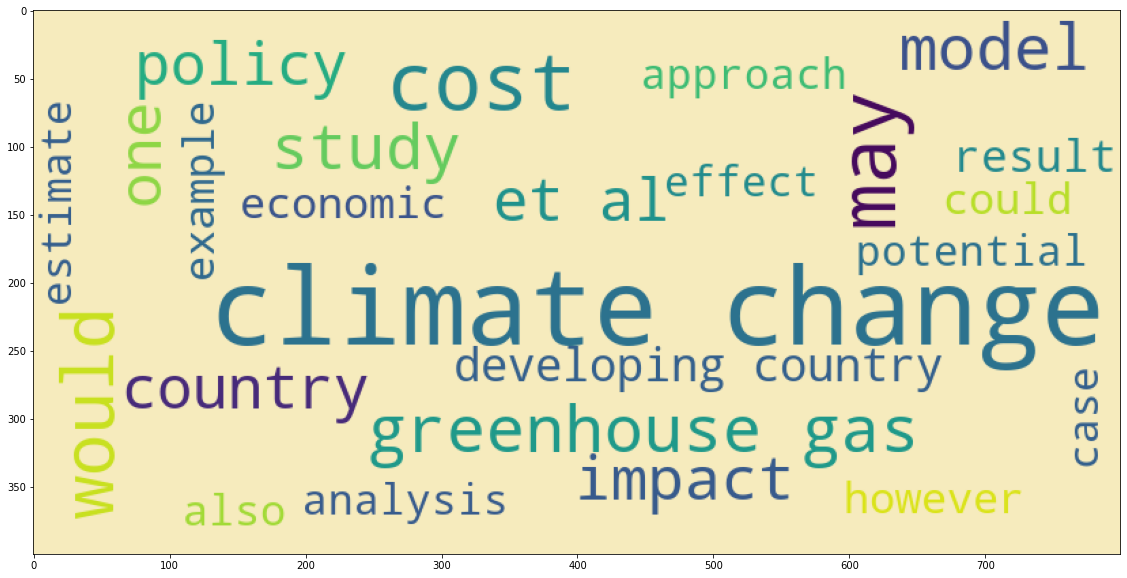

In [23]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=[]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # basic cloud

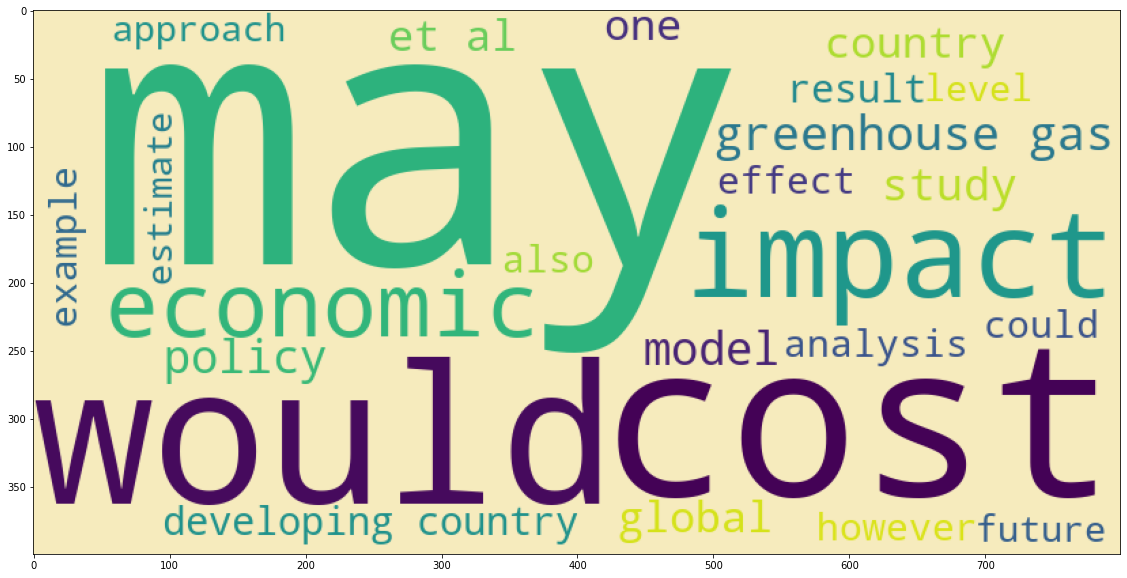

In [25]:
wordcloud = WordCloud(background_color=(246,235,189),max_words=25, width=800, height=400,random_state=30,stopwords=["climate", "change", "emission", "emissions"]).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud); # removing some of the more prominent terms

# can remove words with the stopwords function in first line. because it reads for bigrams, have to remove individual terms 

# add ",collocations=False" before generate function in first line to stop bigrams and focus on individual terms; must be in parentheses

# change max_words number to increase or limit terms

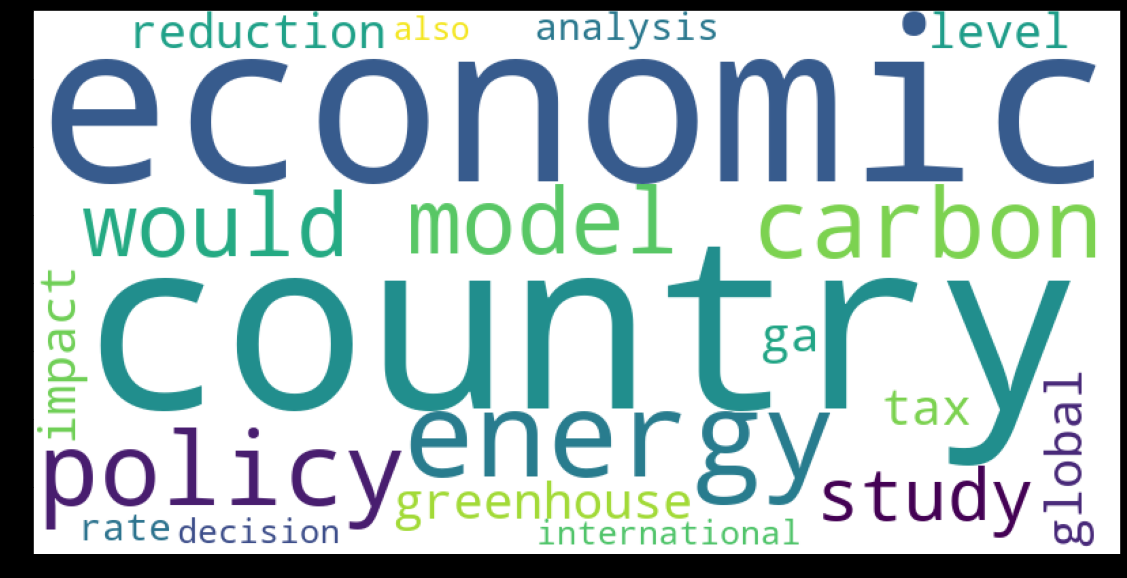

In [27]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=["climate", "change", "emission", "may", "cost"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and select stopwords

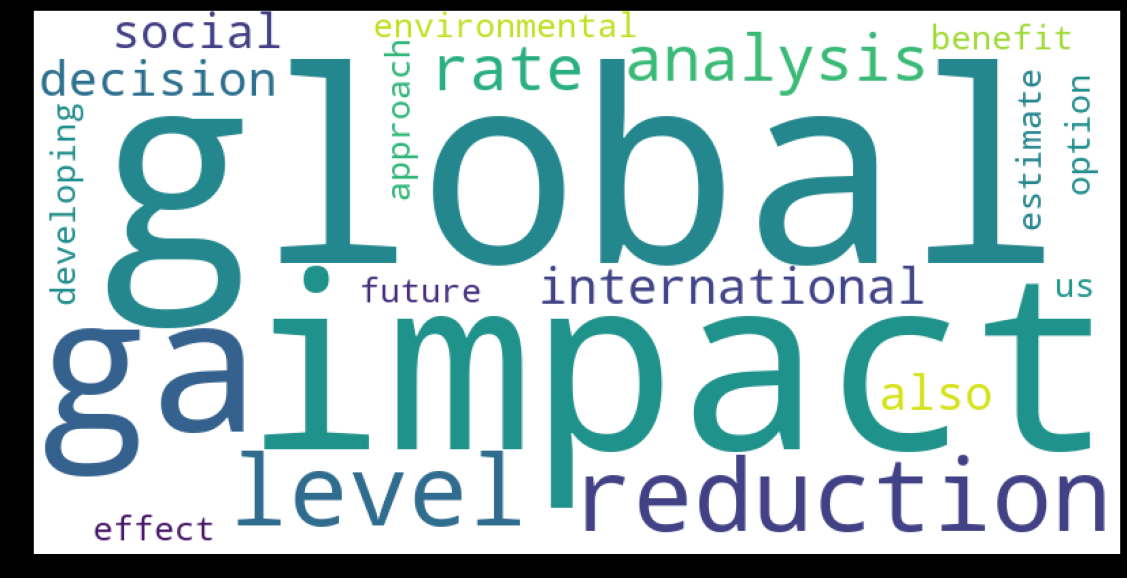

In [28]:
wordcloud_ab = WordCloud(background_color="white",max_words=20, width=800, height=400,stopwords=["climate", "change", "emission", "may", "cost", "country", "energy", "economic", "policy", "greenhouse", "carbon", "study", "tax", "would", "model"], collocations=False).generate(' '.join(df['report'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_ab); # removing bigrams and top 15 terms

In [31]:
occurrences = MC9.count("warming")
print("Number of times the word \'warming\' appears:", occurrences)

Number of times the word 'warming' appears: 316
